In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns             # Add some extra plotting capabilitiy

# Use a colourblind-friendly paleytte
sns.set(context = 'talk', palette = 'colorblind')

In [2]:
TABLE1 = "5206001_key_aggregates.csv"

In [3]:
import csv

with open(TABLE1, newline='') as csvfile:
    reader = csv.reader(csvfile)          # reader is an reader object (iterable), not a list
    for row in reader:                    # Each row becomes a list, whose elements are strings
        print(row)


['', 'Gross domestic product: Chain volume measures - Percentage changes ;', 'GDP per capita: Chain volume measures - Percentage changes ;', 'Gross value added market sector: Chain volume measures - Percentage changes ;', 'Net domestic product: Chain volume measures - Percentage changes ;', 'Real gross domestic income: Chain volume measures - Percentage changes ;', 'Real gross national income: Chain volume measures - Percentage changes ;', 'Real net national disposable income: Chain volume measures - Percentage changes ;', 'Real net national disposable income per capita: Chain volume measures - Percentage changes ;', 'Gross domestic product: Current prices - Percentage Changes ;', 'Hours worked: Index - Percentage changes ;', 'Hours worked market sector: Index - Percentage changes ;', 'GDP per hour worked: Index - Percentage changes ;', 'Gross value added per hour worked market sector: Index - Percentage changes ;', 'Real unit of labour costs: Index - Percentage changes ;', 'Real unit 

In [4]:
with open(TABLE1, newline = '') as csvfile:
    # A list of lists of strings
    data = list(csv.reader(csvfile))

data[:3]

[['',
  'Gross domestic product: Chain volume measures - Percentage changes ;',
  'GDP per capita: Chain volume measures - Percentage changes ;',
  'Gross value added market sector: Chain volume measures - Percentage changes ;',
  'Net domestic product: Chain volume measures - Percentage changes ;',
  'Real gross domestic income: Chain volume measures - Percentage changes ;',
  'Real gross national income: Chain volume measures - Percentage changes ;',
  'Real net national disposable income: Chain volume measures - Percentage changes ;',
  'Real net national disposable income per capita: Chain volume measures - Percentage changes ;',
  'Gross domestic product: Current prices - Percentage Changes ;',
  'Hours worked: Index - Percentage changes ;',
  'Hours worked market sector: Index - Percentage changes ;',
  'GDP per hour worked: Index - Percentage changes ;',
  'Gross value added per hour worked market sector: Index - Percentage changes ;',
  'Real unit of labour costs: Index - Perce

In [5]:
quarters = []
GDP_changes = []

QUARTER = 0
SEASONAL = 38 # The adjusted values

with open(TABLE1, newline = '') as csvfile:
    reader = csv.reader(csvfile)
    row = next(reader)

    while row[QUARTER] != 'Dec-1973':
        row = next(reader)

    # Now here is the Dec-1973
    quarters.append(row[QUARTER])
    GDP_changes.append(float(row[SEASONAL]))

    # Reamining data : Dec-1973 not included
    for row in reader:
        quarters.append(row[QUARTER])
        try:
            # Let anything that can't be returned as a float fail
            GDP_changes.append(float(row[SEASONAL]))
        except ValueError:
            # Catch failure(the ValueError), and put in 'nan'
            GDP_changes.append(float('nan'))

print(GDP_changes)

[2.1, -0.4, -2.4, 0.8, -0.3, 0.2, 2.9, -1.4, -1.8, 4.2, 0.1, 0.5, 0.6, -0.8, 1.1, -0.7, -0.6, 0.4, 0.5, 1.3, 0.6, 2.4, -1.9, 0.6, 1.6, 0.1, -0.1, 0.2, 1.3, 0.0, 1.1, 1.6, -0.8, -1.2, 0.5, -1.0, -1.9, -1.4, -0.5, 2.5, 1.4, 2.2, 0.8, 0.5, 0.4, 1.1, 1.9, 1.0, -0.6, 0.3, -0.6, -0.1, 1.3, 0.6, 1.2, 1.4, 1.6, 0.0, -0.3, 0.3, 1.1, 0.6, 1.8, 0.5, -0.7, 0.5, -0.3, -0.9, 0.3, -1.6, -0.4, 0.1, -0.2, 0.5, 0.5, 0.8, 1.8, 0.5, 0.4, -0.1, 1.6, 1.4, 1.0, 0.5, 0.7, -0.3, 0.0, 2.0, -0.3, 1.4, 0.4, 0.5, 0.6, 0.4, 2.7, -0.1, 1.2, 0.4, 0.7, 1.7, 1.3, 0.5, 0.1, 0.9, 1.4, 0.1, 0.6, -0.1, -0.7, 0.7, 0.5, 0.9, 0.9, 0.5, 1.4, 0.1, 0.4, -0.2, 0.0, 1.4, 1.4, 0.5, 0.4, 0.5, 0.5, 0.5, 0.1, 0.7, 0.5, -0.1, -0.2, 1.0, 0.8, 1.0, 0.1, 0.6, 0.0, 0.6, -0.3, 0.2, -1.0, 0.5, 0.1, -0.1, 0.3, 0.1, 0.2, 0.4, 0.7, -0.6, 0.8, 0.9, 0.7, 0.5, 0.3, 0.1, 0.1, -0.1, 0.0, 0.4, 0.4, 0.3, 0.2, 0.1, 0.0, 0.5, -0.2, 0.7, 0.2, 0.5, 0.3, -0.3, 0.6, -0.1, 0.2, 0.6, 0.2, 0.5, 0.4, -0.1, -0.2, 0.1, 0.3, 0.2, 0.2, -0.7]


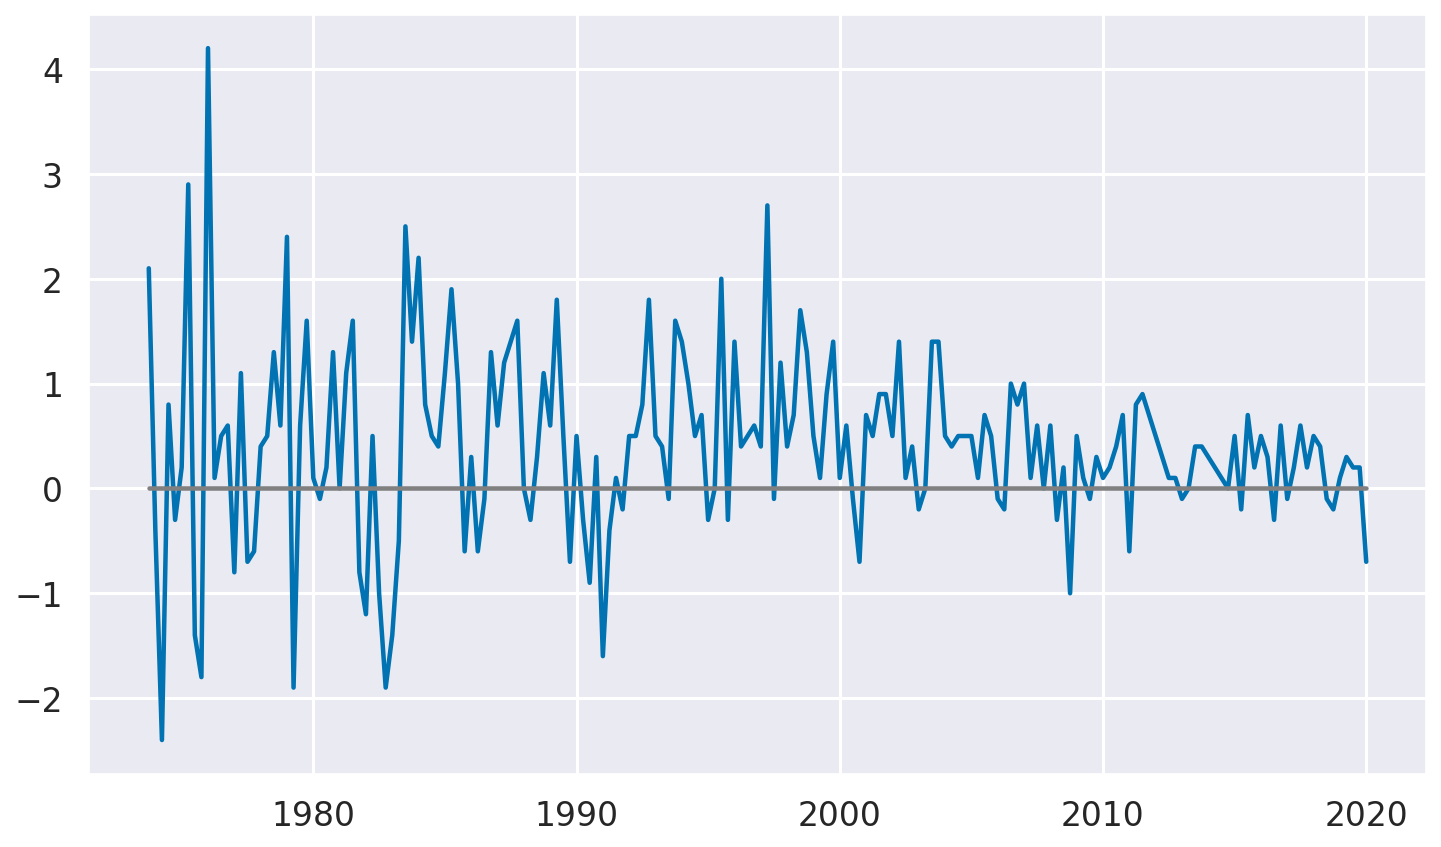

In [6]:
GDPs = np.array(GDP_changes)
dates = np.arange(1973.75, 2020.25, 0.25)

plt.plot(dates, GDPs)
plt.plot(dates, np.zeros_like(GDPs), color = "grey")
plt.show()

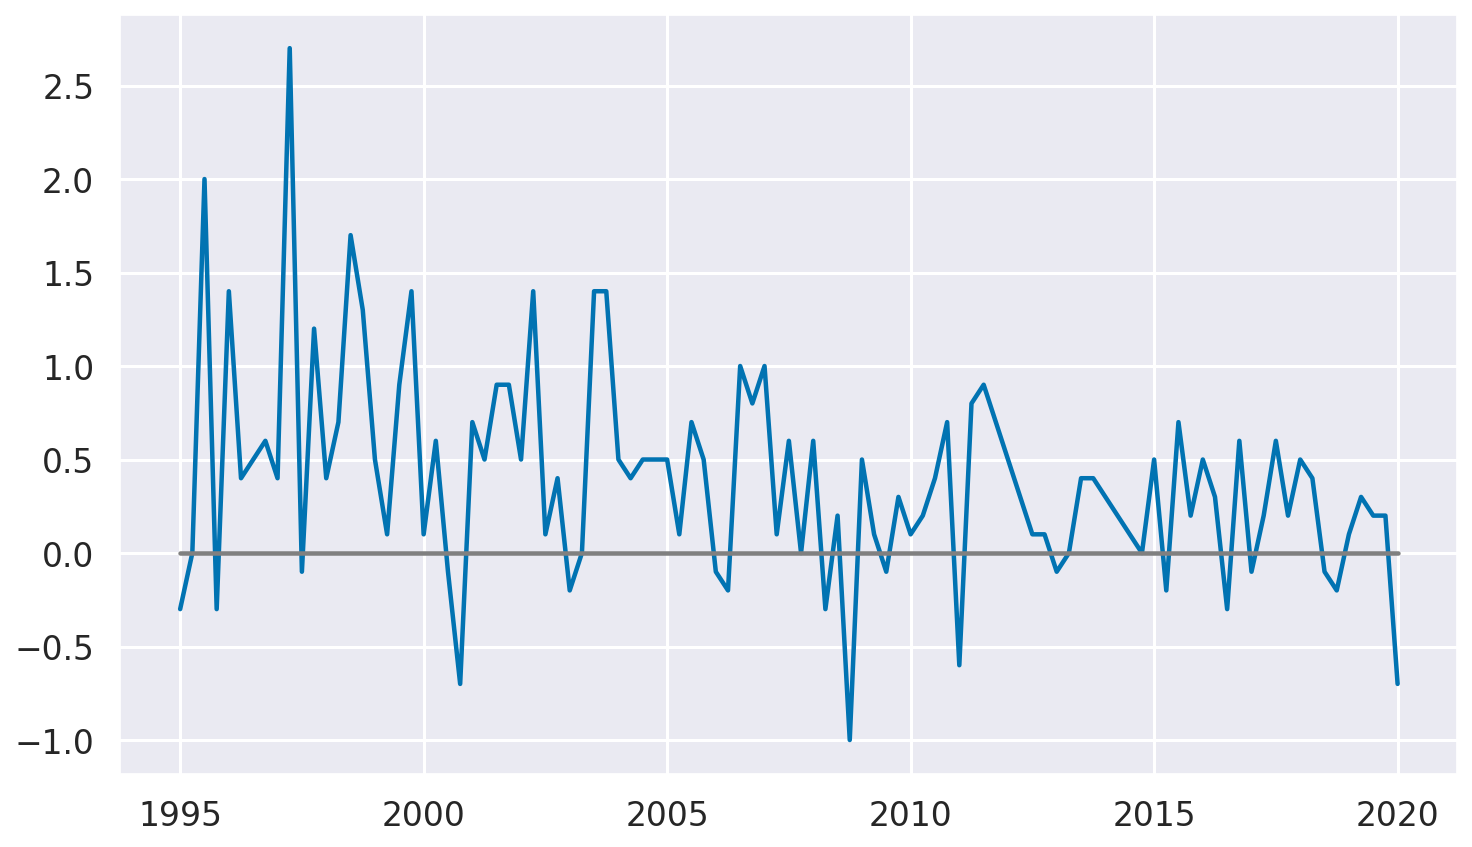

In [7]:
mask = dates >= 1995

abc_dates = dates[mask]
abd_GDPs = GDPs[mask]

plt.plot(abc_dates, abd_GDPs)
plt.plot(dates[mask], np.zeros_like(abd_GDPs), color = "grey")
plt.show()

In [8]:
# We can use 2-d array to get the annualised data

# Set up the array shape, fill with zeros
shifts = np.zeros((4, len(GDPs)))

# Same as shifts[0, :]
shifts[0] = GDPs
shifts[1, 1:] = GDPs[:-1]
shifts[2, 2:] = GDPs[:-2]
shifts[3, 3:] = GDPs[:-3]

# Print teh first 10 columns
print(shifts[:, :10])

[[ 2.1 -0.4 -2.4  0.8 -0.3  0.2  2.9 -1.4 -1.8  4.2]
 [ 0.   2.1 -0.4 -2.4  0.8 -0.3  0.2  2.9 -1.4 -1.8]
 [ 0.   0.   2.1 -0.4 -2.4  0.8 -0.3  0.2  2.9 -1.4]
 [ 0.   0.   0.   2.1 -0.4 -2.4  0.8 -0.3  0.2  2.9]]


In [9]:
short_and_wide = np.array([[1,2,3,4,5], [6,7,8,9,10]])
print(short_and_wide)
print(short_and_wide.shape)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
(2, 5)


In [10]:
# 0: adding all the columns
print(short_and_wide.sum(0))

# 1: adding all the rows
print(short_and_wide.sum(1))

[ 7  9 11 13 15]
[15 40]


In [11]:

# Transpose the array (matrix)
tall_and_thin = short_and_wide.T

print(tall_and_thin)
print(tall_and_thin.shape)
print(tall_and_thin.sum(0))
print(tall_and_thin.sum(1))

[[ 1  6]
 [ 2  7]
 [ 3  8]
 [ 4  9]
 [ 5 10]]
(5, 2)
[15 40]
[ 7  9 11 13 15]


In [12]:
# We can use 2-d array to get the annualised data

# Set up the array shape, fill with zeros
shifts = np.zeros((4, len(GDPs)))

# Same as shifts[0, :]
shifts[0] = GDPs
shifts[1, 1:] = GDPs[:-1]
shifts[2, 2:] = GDPs[:-2]
shifts[3, 3:] = GDPs[:-3]

# Now sum up the value
annualised = shifts.sum(0)

print(shifts[:, :10])
print(annualised[:10])

[[ 2.1 -0.4 -2.4  0.8 -0.3  0.2  2.9 -1.4 -1.8  4.2]
 [ 0.   2.1 -0.4 -2.4  0.8 -0.3  0.2  2.9 -1.4 -1.8]
 [ 0.   0.   2.1 -0.4 -2.4  0.8 -0.3  0.2  2.9 -1.4]
 [ 0.   0.   0.   2.1 -0.4 -2.4  0.8 -0.3  0.2  2.9]]
[ 2.1  1.7 -0.7  0.1 -2.3 -1.7  3.6  1.4 -0.1  3.9]


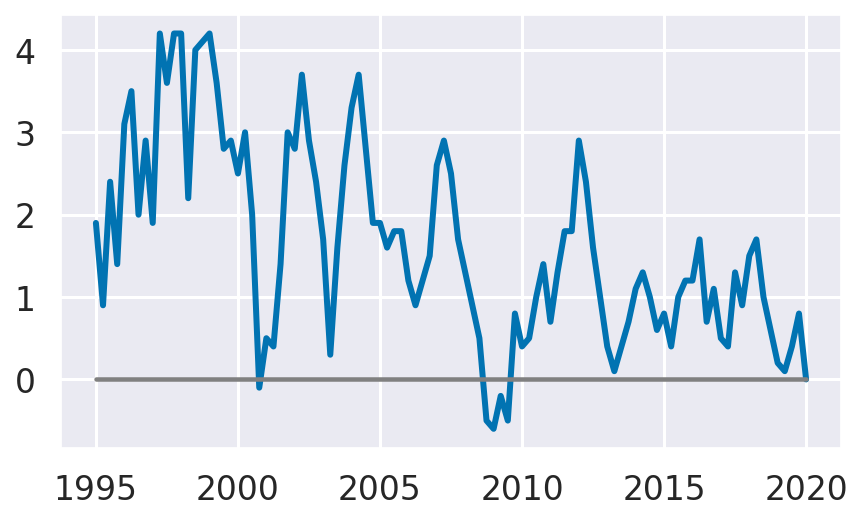

In [13]:
plt.figure(figsize = (7, 4))
abc_annualised = annualised[mask]
plt.plot(abc_dates, abc_annualised, linewidth = 3)
plt.plot(abc_dates, np.zeros_like(abc_dates), color = "grey")
plt.show()

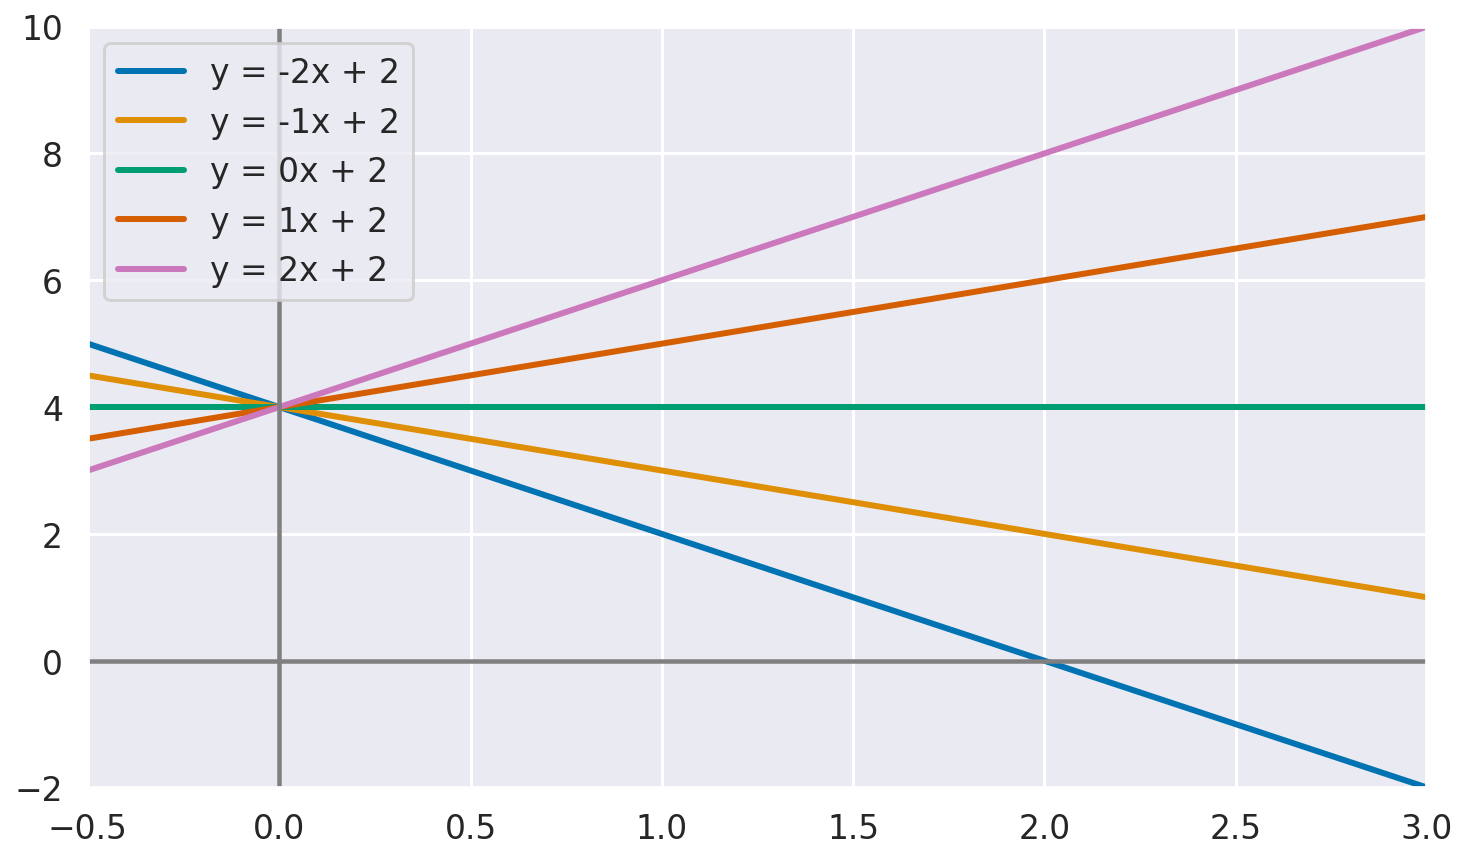

In [14]:
def get_line(xs, slope, intercept):
    return xs * slope + intercept

plt.axes(xmargin = 0, ymargin = 0)
xs = np.linspace(-0.5, 3)

for slope in np.arange(-2, 3):
    plt.plot(xs, get_line(xs, slope, 4), linewidth = 3, label = "y = " + str(slope) + "x + 2")

plt.axhline(0, color = "grey")
plt.axvline(0, color = "grey")
plt.legend(loc = "upper left")

plt.show()

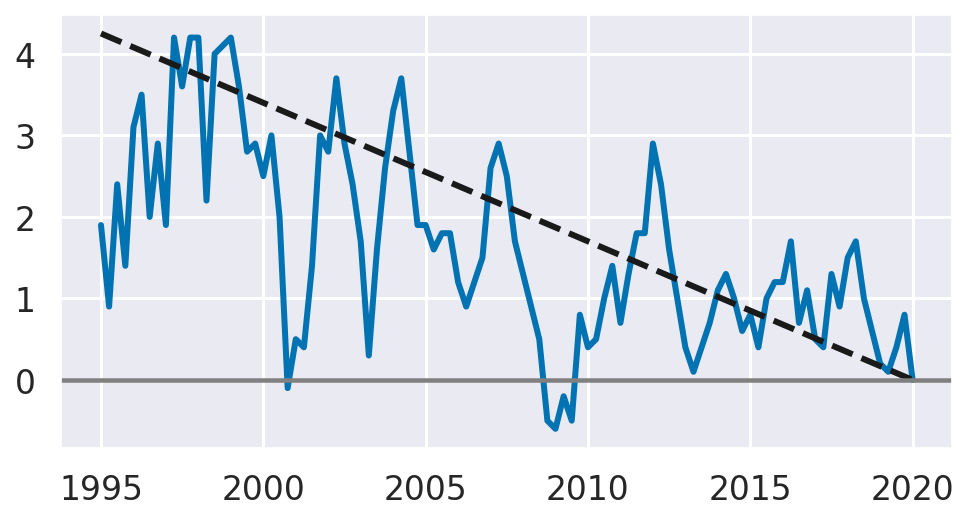

In [15]:
# Now we try to guessestate the values

plt.figure(figsize = (8, 4))

slope = -0.170
intercept = 343.4

plt.plot(abc_dates, abc_annualised, linewidth = 3)
plt.plot(abc_dates, get_line(abc_dates, slope, intercept), "k--", linewidth = 3)

plt.axhline(0, color = "grey")

plt.show()

In [16]:
# date needs to be the float number
def gdp_loop1(date, dates, GDPs):
    for (the_date, the_gdp) in zip(dates, GDPs):
        if np.isclose(date, the_date):
            return the_gdp
    # If you couldn't find the index in the array
    raise IndexError

gdp_loop1(2010.00000000000001, abc_dates, abc_annualised)

0.4

In [17]:
def gdp(date, dates, GDPs):
    return GDPs[np.nonzero(np.isclose(dates, date))[0][0]]

gdp(2010., abc_dates, abc_annualised)
gdp(2010.00000000000001, abc_dates, abc_annualised)

0.4

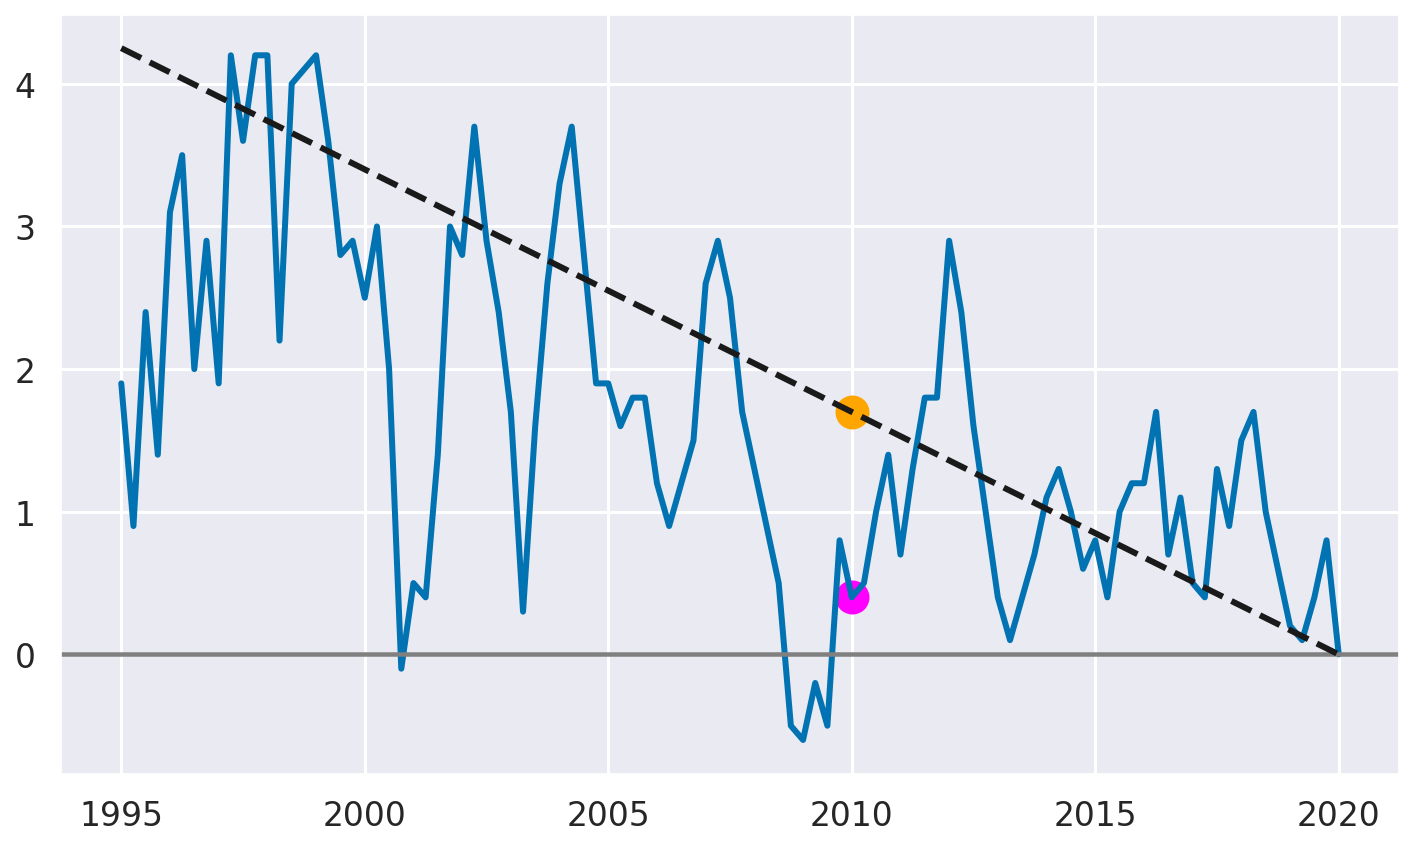

In [18]:
plt.plot(abc_dates, abc_annualised, linewidth = 3)
plt.axhline(0, color = "grey")
plt.plot(abc_dates, get_line(abc_dates, slope, intercept), "k--", linewidth = 3)

mydate = 2010.0
prediction = get_line(mydate, slope, intercept)
actual = gdp(mydate, abc_dates, abc_annualised)

plt.scatter(mydate, prediction, color = "orange", linewidth = 8, label = "prediction")
plt.scatter(mydate, actual, color = "magenta", linewidth = 8, label = "actual")

plt.show()

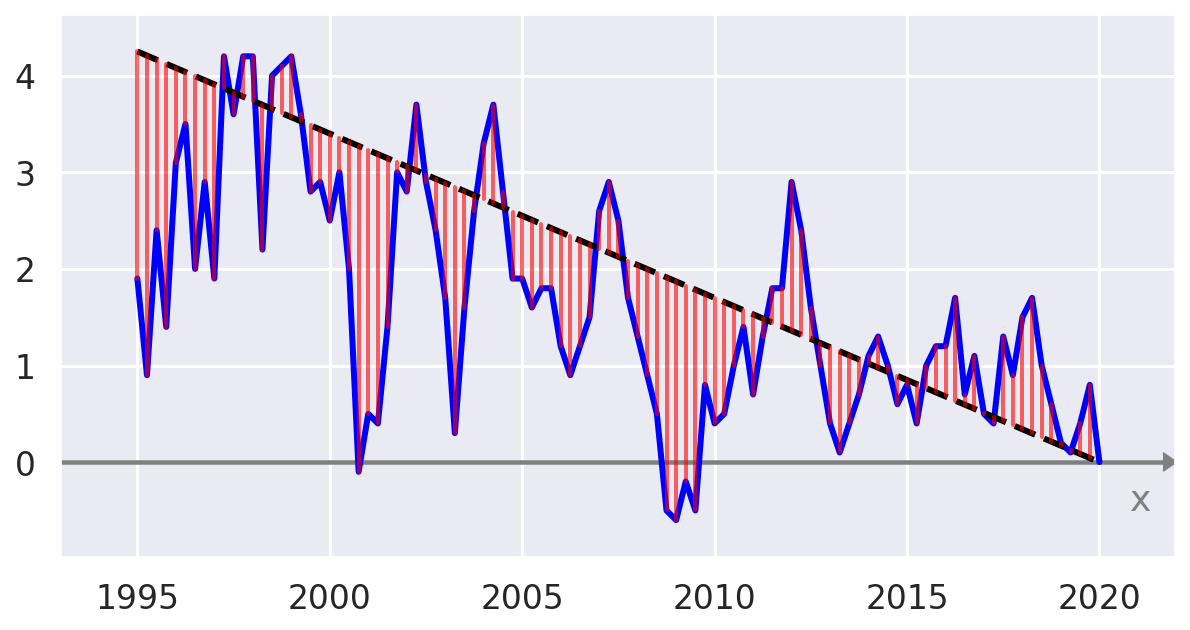

In [19]:
def plot_trends(dates, gdps, slope, intercept, residuals = True):
    plt.figure(figsize = (10, 5))
    plt.margins(0.08)

    if np.min(gdps) < 0 and np.max(gdps) > 0:
        plt.axhline(color = "grey", marker = 5)
        # Just to put the label x below the x-axis
        plt.text(np.max(dates) + 0.8, -0.5, "x", color = "grey")

    if np.min(dates) < 0 and np.max(dates) > 0:
        plt.axvline(color = "grey", marker = 6)
        plt.text(-0.8, np.max(gdps) + 0.1, "y", color = "grey")

    plt.plot(dates, gdps, color = 'blue', linewidth = 3)
    plt.plot(dates, slope * dates + intercept, linestyle = 'dashed', color = 'black', linewidth = 3)

    if residuals:
        for (date, gdp) in zip(dates, gdps):
            prediction = slope * date + intercept
            plt.plot(np.array([date, date]), np.array([prediction, gdp]), color = "red", linewidth = 2, alpha = 0.6)

    plt.show()

# check
slope = -0.170
intercept = 343.4
plot_trends(abc_dates, abc_annualised, slope, intercept)

In [20]:
# Use for loop to get the mean absolute error
mysum = 0
n = len(abc_dates)
for i in range(n):
    mysum = mysum + abs(abc_annualised[i] - get_line(abc_dates[i], slope, intercept))

mae = mysum / n
mae

0.8813861386138475

In [21]:
# Use array operation to do that
mae = np.sum(np.abs(abc_annualised - get_line(abc_dates, slope, intercept)))/n
mae

0.8813861386138477

In [22]:
# Use array operation to do that
mae = np.mean(np.abs(abc_annualised - get_line(abc_dates, slope, intercept)))
mae

0.8813861386138477

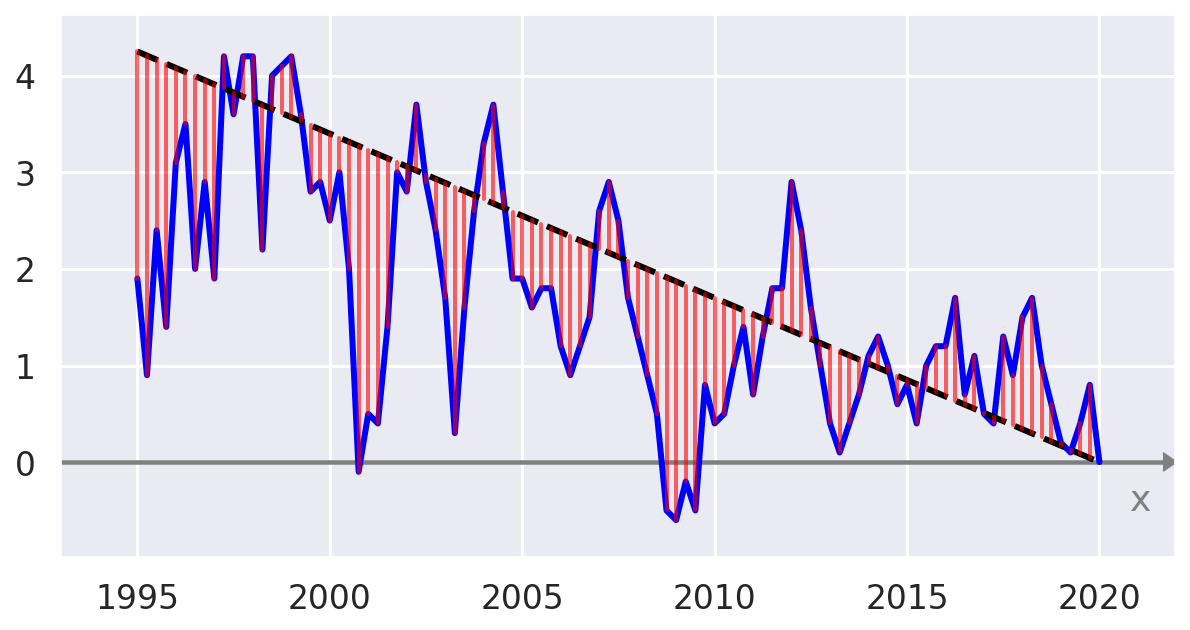

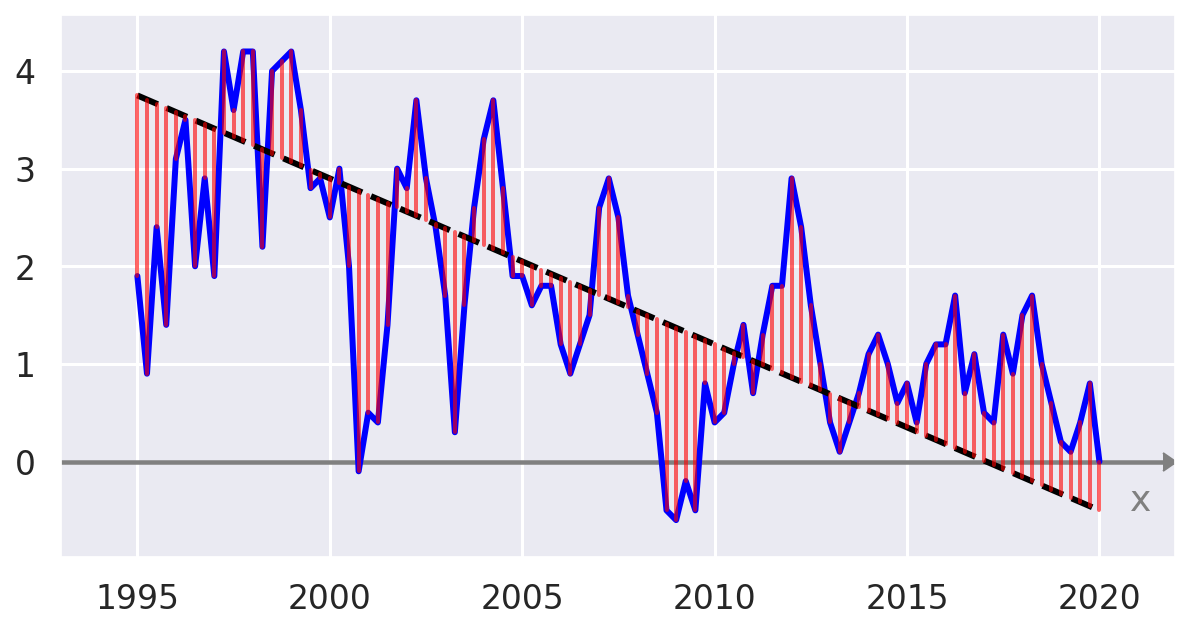

In [23]:
plot_trends(abc_dates, abc_annualised, slope, intercept)
plot_trends(abc_dates, abc_annualised, slope, intercept - 0.5)

In [24]:
mae_adapted = np.mean(np.abs(abc_annualised - get_line(abc_dates, slope, intercept - 0.5)))
mae_adapted

0.8591089108910932

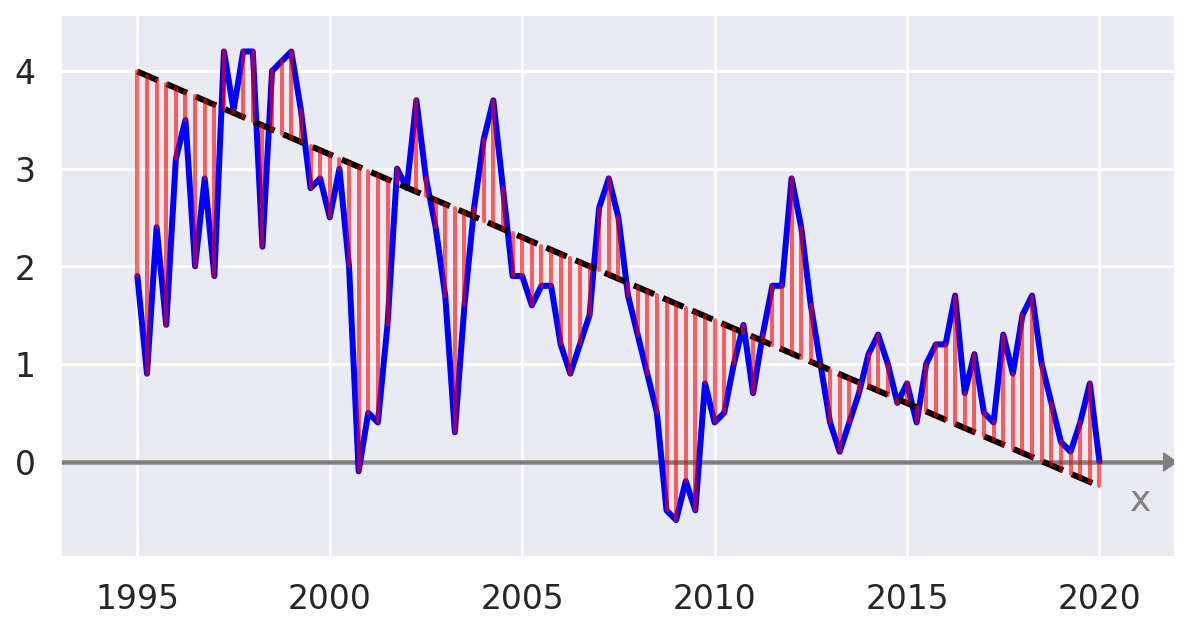

In [25]:
plot_trends(abc_dates, abc_annualised, slope + 0.000123, intercept - 0.5)

In [26]:
mae_adapted1 = np.mean(np.abs(abc_annualised - get_line(abc_dates, slope + 0.000123, intercept - 0.5)))
mae_adapted1

0.8475062326732671

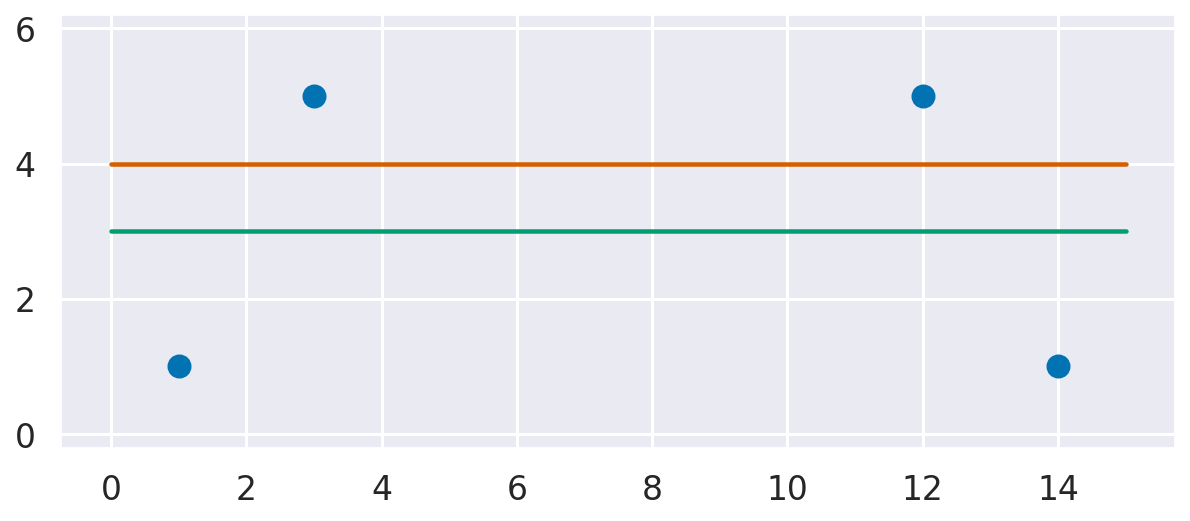

In [27]:
plt.figure(figsize=(10,4))

sample_xs = np.array([1,3,12,14])
sample_ys = np.array([1,5,5,1])

plt.scatter(sample_xs, sample_ys, linewidth=3)

line_xs = np.linspace(0,15)

line1_ys = np.full_like(line_xs, 3)
line2_ys = np.full_like(line_xs, 4)

plt.plot(line_xs, line1_ys, 'g')
plt.plot(line_xs, line2_ys, 'r')

plt.axis('equal')
plt.show()

In [28]:
def mse3 (sample_values, model_values):
    return np.mean(np.square(sample_values - model_vales))

In [29]:
def mse4 (sample_values, model_values):
    return np.square(sample_values - model_values).mean()

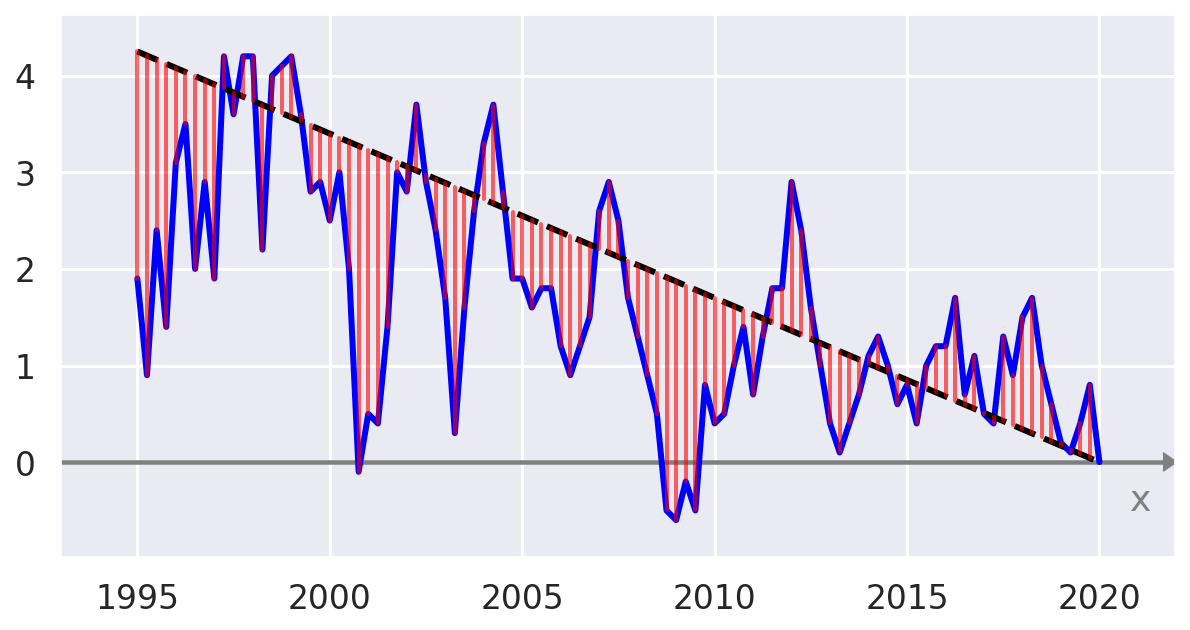

Slope: -0.17 	Intercept: 343.4 	MSE: 1.3759474009900505


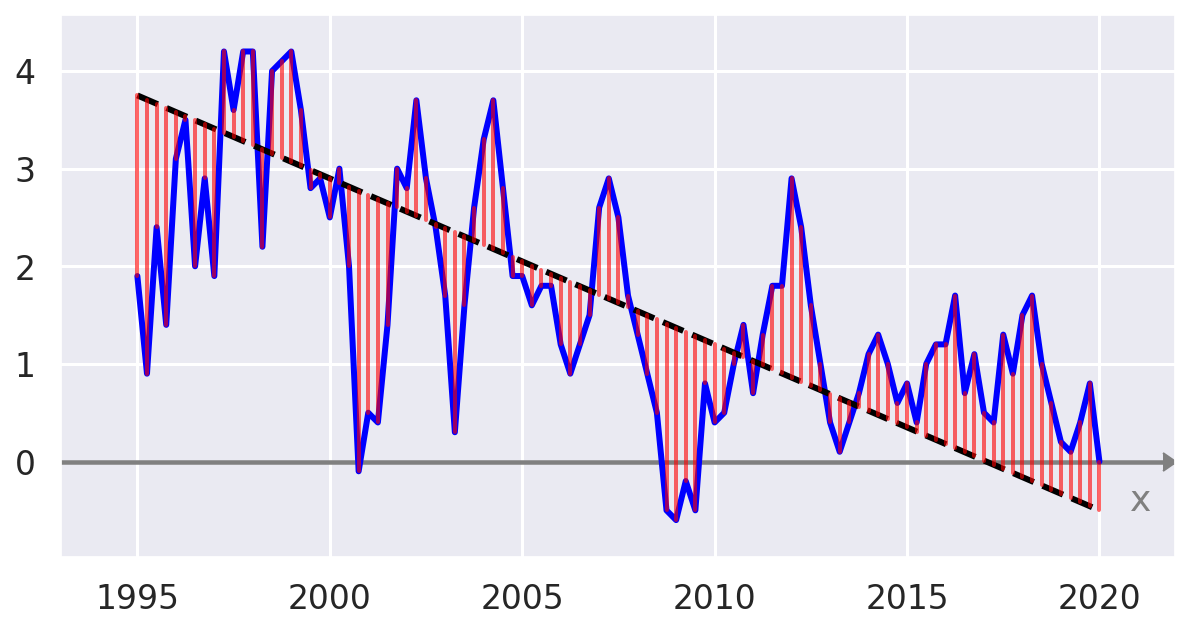

Slope: -0.17 	Intercept: 343.4 	MSE: 1.1405513613861378


In [30]:

plot_trends(abc_dates, abc_annualised, slope, intercept)
mse = mse4(abc_annualised, get_line(abc_dates, slope, intercept))
print("Slope:", slope, "\tIntercept:", intercept, "\tMSE:", mse)

plot_trends(abc_dates, abc_annualised, slope, intercept - 0.5)
mse_adapted = mse4(abc_annualised, get_line(abc_dates, slope, intercept - 0.5))
print("Slope:", slope, "\tIntercept:", intercept, "\tMSE:", mse_adapted)

In [31]:
print((mae_adapted - mae)/mae)
print((mse_adapted - mse)/mse)

-0.02527521905187871
-0.17107924287987727


In [32]:
rmse = np.sqrt(mse)
rmse_adapted = np.sqrt(mse_adapted)
print(rmse, rmse_adapted, (rmse_adapted - rmse)/rmse)

1.1730078435330475 1.0679659926168705 -0.08954914623571111


In [33]:
from sklearn.metrics import mean_squared_error as skmse

In [34]:
np.median(abc_dates)

2007.5

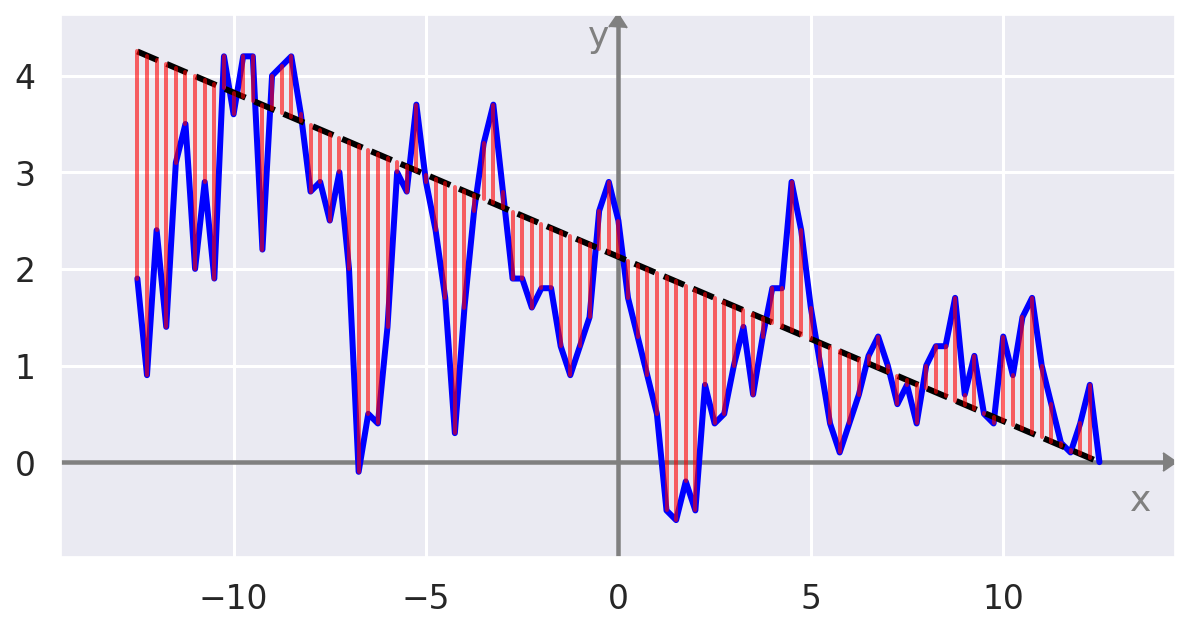

Slope: -0.17 	Intercept: 2.124999999999943 	MSE: 1.3759474009900439


In [35]:
slope = -0.170
intercept = 343.4

# New valued shifted by median
mdates = abc_dates - np.median(abc_dates)
mslope = slope
mintercept = get_line(np.median(abc_dates), slope, intercept)

plot_trends(mdates, abc_annualised, mslope, mintercept)
print("Slope:", mslope, "\tIntercept:", mintercept, "\tMSE:", skmse(abc_annualised, get_line(mdates, mslope, mintercept)))

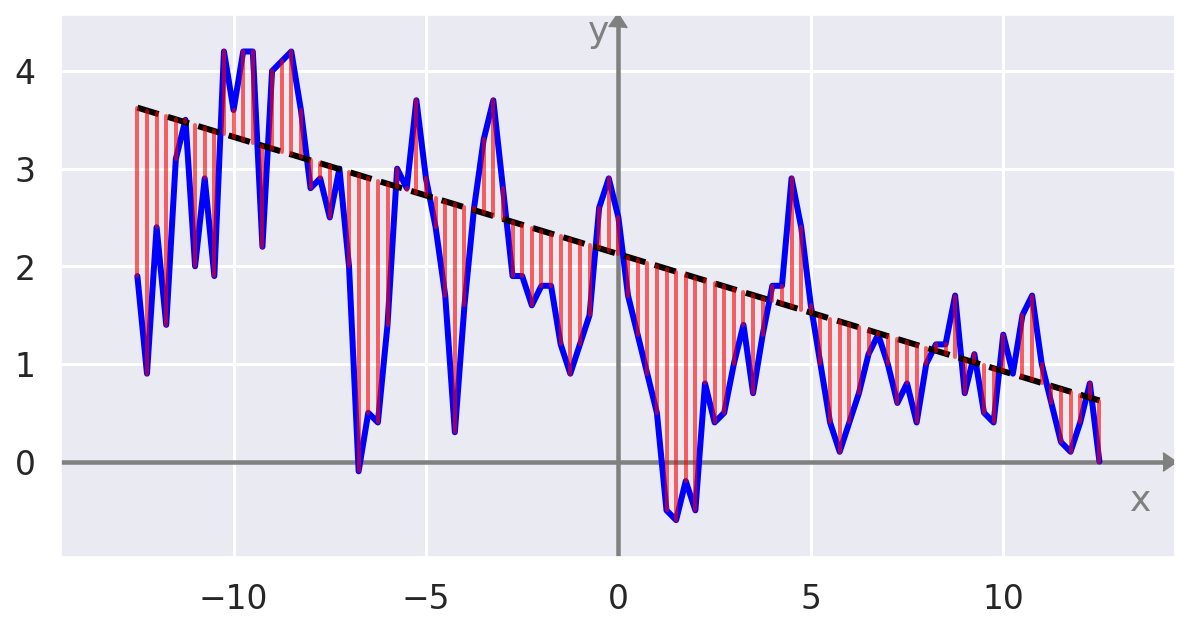

Slope: -0.17 	Intercept: 2.125 	MSE: 1.1443477722772277


In [36]:
mslope = -0.170
mintercept = 2.125
plot_trends(mdates, abc_annualised, mslope + 0.05, mintercept)

print("Slope:", mslope, "\tIntercept:", mintercept, "\tMSE:", skmse(abc_annualised, get_line(mdates, mslope + 0.05, mintercept)))

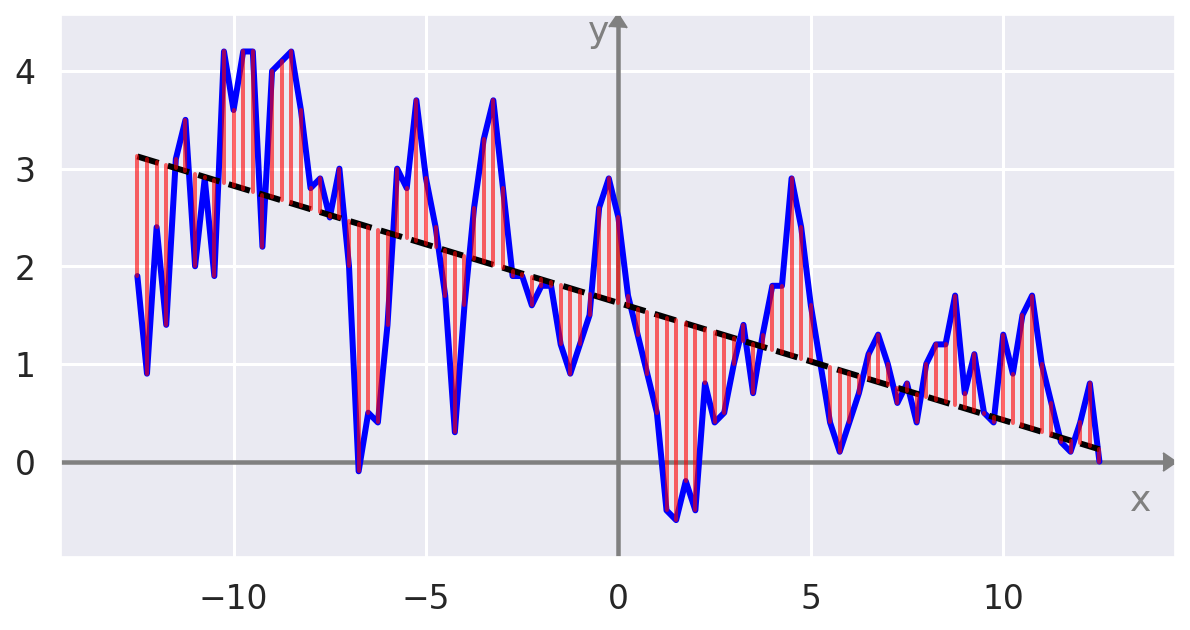

Slope: -0.17 	Intercept: 2.125 	MSE: 0.9089517326732676


In [37]:
mslope = -0.170
mintercept = 2.125
plot_trends(mdates, abc_annualised, mslope + 0.05, mintercept - 0.5)

print("Slope:", mslope, "\tIntercept:", mintercept, "\tMSE:", skmse(abc_annualised, get_line(mdates, mslope + 0.05, mintercept - 0.5)))

In [38]:
def rotate(slope, phi):
    # Rotate the slope by phi degrees
    phi_radians = phi/360 * 2 * np.pi
    return np.tan(phi_radians + np.arctan(slope))

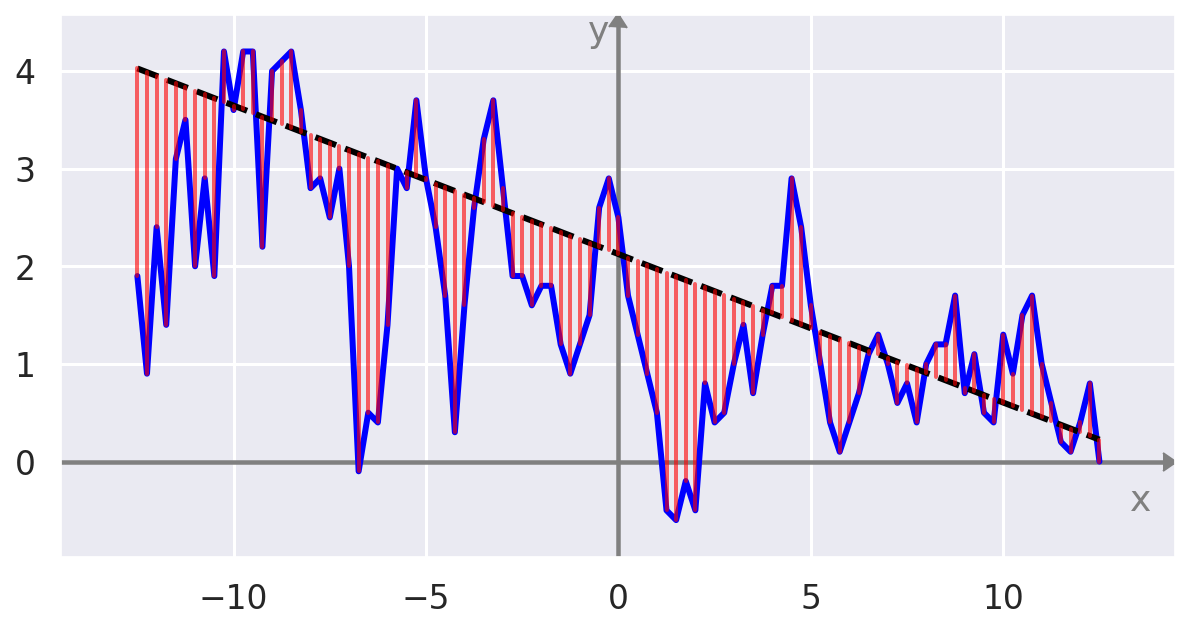

Slope: -0.17 	Intercept: 2.125 	MSE: 1.262475268651255


In [39]:
# Rotate anti-clockwise by 1 degree
new_slope = rotate(mslope, 1)

plot_trends(mdates, abc_annualised, new_slope, mintercept)

print("Slope:", mslope, "\tIntercept:", mintercept, "\tMSE:", skmse(abc_annualised, get_line(mdates, new_slope, mintercept)))

In [40]:
new_slope = -0.170
mintercept = 2.125

new_mse = skmse(abc_annualised, get_line(mdates, new_slope, mintercept))

count = 0
print("Iteration:", count, "\tSlope:", new_slope, "\tMSE:", new_mse)

getting_better = True

while getting_better:
    old_slope = new_slope
    old_mse = new_mse

    count = count + 1

    new_slope = rotate(old_slope, 1)
    new_mse = skmse(abc_annualised, get_line(mdates, new_slope, mintercept))

    print("Iteration:", count, "\tSlope:", new_slope, "\tMSE:", new_mse)
    getting_better = new_mse < old_mse

print("\nBest Slope:", old_slope, "\tBest MSE:", old_mse)

Iteration: 0 	Slope: -0.17 	MSE: 1.375947400990099
Iteration: 1 	Slope: -0.15209361839446114 	MSE: 1.262475268651255
Iteration: 2 	Slope: -0.13428206091591166 	MSE: 1.1834017402272408
Iteration: 3 	Slope: -0.11655380527967059 	MSE: 1.1381699048580207
Iteration: 4 	Slope: -0.0988975378363961 	MSE: 1.1263120407940257
Iteration: 5 	Slope: -0.08130212406412389 	MSE: 1.1474467788608975

Best Slope: -0.0988975378363961 	Best MSE: 1.1263120407940257


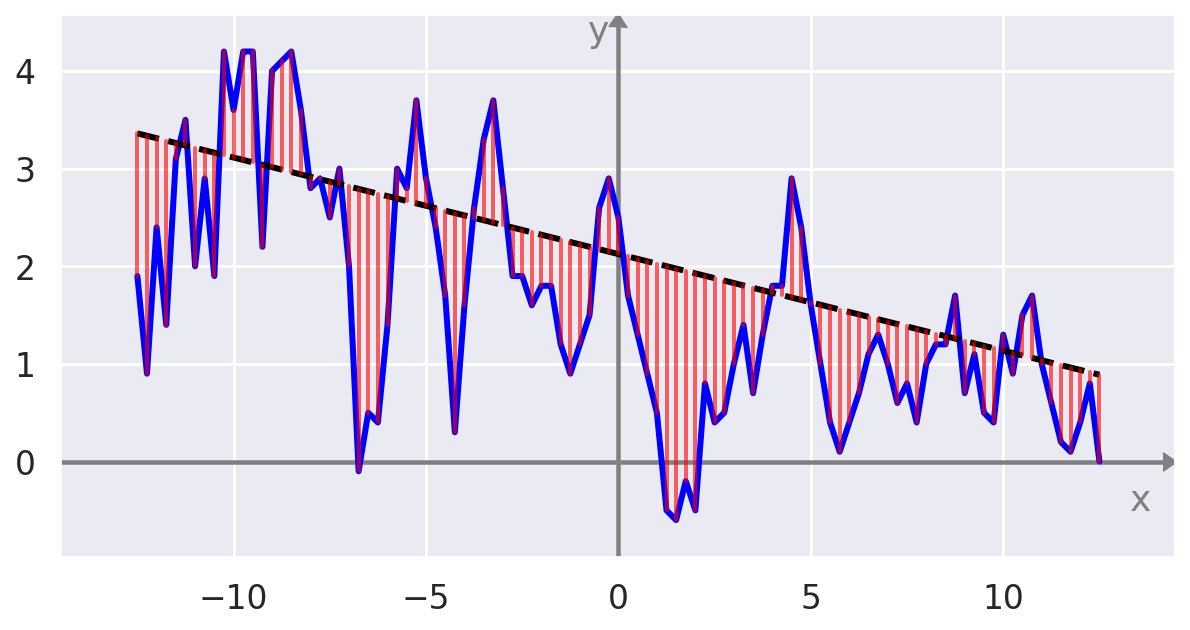

In [41]:
plot_trends(mdates, abc_annualised, old_slope, mintercept)

In [42]:
# Get the smallest mse from the slope and intercept list
def get_best_parameters (dates, gdps, paramlist):
    mses = []
    for (slope, intercept) in paramlist:
        eval_mse = skmse(gdps, get_line(dates, slope, intercept))
        mses.append((eval_mse, slope, intercept))
    return sorted(mses)[0]

In [43]:
# General purpose method to optimise slope only

# Step is the size of changing the slope each time
def optimise_slope (dates, gdps, start_slope, intercept, step):
    new_slope = start_slope
    new_mse = skmse(abc_annualised, get_line(mdates, new_slope, mintercept))

    count = 0
    print("Iteration:", count, "\tSlope:", new_slope, "\tMSE:", new_mse)

    getting_better = True

    while getting_better:
        old_slope = new_slope
        old_mse = new_mse

        count = count + 1

        # Try to rotate in both directions
        (new_mse, new_slope, intercept) = get_best_parameters(dates, gdps,
                                          [(rotate(old_slope, step), intercept),
                                           (rotate(old_slope, -step), intercept)])

        print("Iteration:", count, "\tSlope:", new_slope, "\tMSE:", new_mse)
        getting_better = new_mse < old_mse

    print("\nBest Slope:", old_slope, "\tBest MSE:", old_mse)

optimise_slope(mdates, abc_annualised, -0.17, 2.125, 0.5)

Iteration: 0 	Slope: -0.17 	MSE: 1.375947400990099
Iteration: 1 	Slope: -0.16103422705965398 	MSE: 1.3148731305448418
Iteration: 2 	Slope: -0.15209361839446112 	MSE: 1.2624752686512546
Iteration: 3 	Slope: -0.14317671202503737 	MSE: 1.2186756129093848
Iteration: 4 	Slope: -0.1342820609159116 	MSE: 1.1834017402272408
Iteration: 5 	Slope: -0.1254082320096229 	MSE: 1.1565868982256906
Iteration: 6 	Slope: -0.11655380527967055 	MSE: 1.1381699048580207
Iteration: 7 	Slope: -0.10771737280095607 	MSE: 1.128095056000975
Iteration: 8 	Slope: -0.09889753783639606 	MSE: 1.1263120407940257
Iteration: 9 	Slope: -0.10771737280095607 	MSE: 1.128095056000975

Best Slope: -0.09889753783639606 	Best MSE: 1.1263120407940257


In [44]:
# General purpose method to optimise intercept only

# Step is the size of changing the intercept each time
def optimise_intercept (dates, gdps, slope, start_intercept, step):
    new_intercept = start_intercept
    new_mse = skmse(abc_annualised, get_line(mdates, slope, new_intercept))

    count = 0
    print("Iteration:", count, "\tIntercept:", new_intercept, "\tMSE:", new_mse)

    getting_better = True

    while getting_better:
        old_intercept = new_intercept
        old_mse = new_mse

        count = count + 1

        # Try to rotate in both directions
        (new_mse, slope, new_intercept) = get_best_parameters(dates, gdps,
                                          [(slope, old_intercept + step),
                                           (slope, old_intercept - step)])

        print("Iteration:", count, "\tIntercept:", new_intercept, "\tMSE:", new_mse)
        getting_better = new_mse < old_mse

    print("\nBest Intercept:", old_intercept, "\tBest MSE:", old_mse)

optimise_intercept(mdates, abc_annualised, -0.17, 2.125, 0.1)

Iteration: 0 	Intercept: 2.125 	MSE: 1.375947400990099
Iteration: 1 	Intercept: 2.025 	MSE: 1.2888681930693067
Iteration: 2 	Intercept: 1.9249999999999998 	MSE: 1.2217889851485149
Iteration: 3 	Intercept: 1.8249999999999997 	MSE: 1.174709777227723
Iteration: 4 	Intercept: 1.7249999999999996 	MSE: 1.1476305693069306
Iteration: 5 	Intercept: 1.6249999999999996 	MSE: 1.1405513613861389
Iteration: 6 	Intercept: 1.7249999999999996 	MSE: 1.1476305693069306

Best Intercept: 1.6249999999999996 	Best MSE: 1.1405513613861389


In [45]:
# General purpose method to optimise intercept and slope
# Use a list called trace to record all the model and how well they did
def optimise (dates, gdps, slope, slope_step, intercept, intercept_step, quiet = False):

    new_mse = skmse(gdps, get_line(mdates, slope, intercept))
    new_slope = slope
    new_intercept = intercept

    trace = []
    count = 0

    if not quiet:
        print("Iteration:", count, "\tMSE:", new_mse,
              "\tSlope:", new_slope, "\tIntercept:", new_intercept)

    getting_better = True

    while getting_better:

        # Record the mdoel and how well it did
        trace.append((new_mse, new_slope, new_intercept))

        (old_mse, old_slope, old_intercept) = (new_mse, new_slope, new_intercept)

        count = count + 1

        # Try to rotate in both directions
        (new_mse, new_slope, new_intercept) = get_best_parameters(dates, gdps,
                             [(rotate(old_slope, slope_step), old_intercept),
                              (rotate(old_slope, -slope_step), old_intercept),
                              (old_slope, old_intercept + intercept_step),
                              (old_slope, old_intercept - intercept_step)])

        if not quiet:
            print("Iteration:", count, "\tMSE:", new_mse,
                  "\tSlope:", new_slope, "\tIntercept:", new_intercept)

        getting_better = new_mse < old_mse

    if not quiet:
        print("\nBest MSE:", old_mse, "\tBest Slope:", old_slope,
              "\tBest Intercept:", old_intercept)

    return (old_mse, old_slope, old_intercept, trace)

(opt_mse, opt_slope, opt_intercept, trace) = optimise(mdates, abc_annualised, -0.17, 0.2, 2.125, 0.02, quiet = True)
opt_mse

0.8904530267159789

In [46]:
trace

[(1.375947400990099, -0.17, 2.125),
 (1.350471274966931, -0.16641057689310657, 2.125),
 (1.3263912664676367, -0.16282532144832104, 2.125),
 (1.303702032099393, -0.159244139191026, 2.125),
 (1.282398380011234, -0.1556669360594497, 2.125),
 (1.2624752686512546, -0.15209361839446112, 2.125),
 (1.2434594270670964, -0.15209361839446112, 2.105),
 (1.2249119639752928, -0.14852409292945282, 2.105),
 (1.206696122391134, -0.14852409292945282, 2.085),
 (1.1892802808069758, -0.14852409292945282, 2.065),
 (1.1721037214432528, -0.1449582667803089, 2.065),
 (1.1554878798590946, -0.1449582667803089, 2.045),
 (1.1396720382749361, -0.1449582667803089, 2.025),
 (1.1238617848818253, -0.14139604743545608, 2.025),
 (1.1088459432976667, -0.14139604743545608, 2.005),
 (1.0943975437973117, -0.13783734274599532, 2.005),
 (1.0801817022131532, -0.13783734274599532, 1.9849999999999999),
 (1.066765860628995, -0.13783734274599532, 1.9649999999999999),
 (1.0536750075539734, -0.1342820609159116, 1.9649999999999999),
 

In [47]:
np.array(trace)

array([[ 1.3759474 , -0.17      ,  2.125     ],
       [ 1.35047127, -0.16641058,  2.125     ],
       [ 1.32639127, -0.16282532,  2.125     ],
       [ 1.30370203, -0.15924414,  2.125     ],
       [ 1.28239838, -0.15566694,  2.125     ],
       [ 1.26247527, -0.15209362,  2.125     ],
       [ 1.24345943, -0.15209362,  2.105     ],
       [ 1.22491196, -0.14852409,  2.105     ],
       [ 1.20669612, -0.14852409,  2.085     ],
       [ 1.18928028, -0.14852409,  2.065     ],
       [ 1.17210372, -0.14495827,  2.065     ],
       [ 1.15548788, -0.14495827,  2.045     ],
       [ 1.13967204, -0.14495827,  2.025     ],
       [ 1.12386178, -0.14139605,  2.025     ],
       [ 1.10884594, -0.14139605,  2.005     ],
       [ 1.09439754, -0.13783734,  2.005     ],
       [ 1.0801817 , -0.13783734,  1.985     ],
       [ 1.06676586, -0.13783734,  1.965     ],
       [ 1.05367501, -0.13428206,  1.965     ],
       [ 1.04105917, -0.13428206,  1.945     ],
       [ 1.02924332, -0.13428206,  1.925

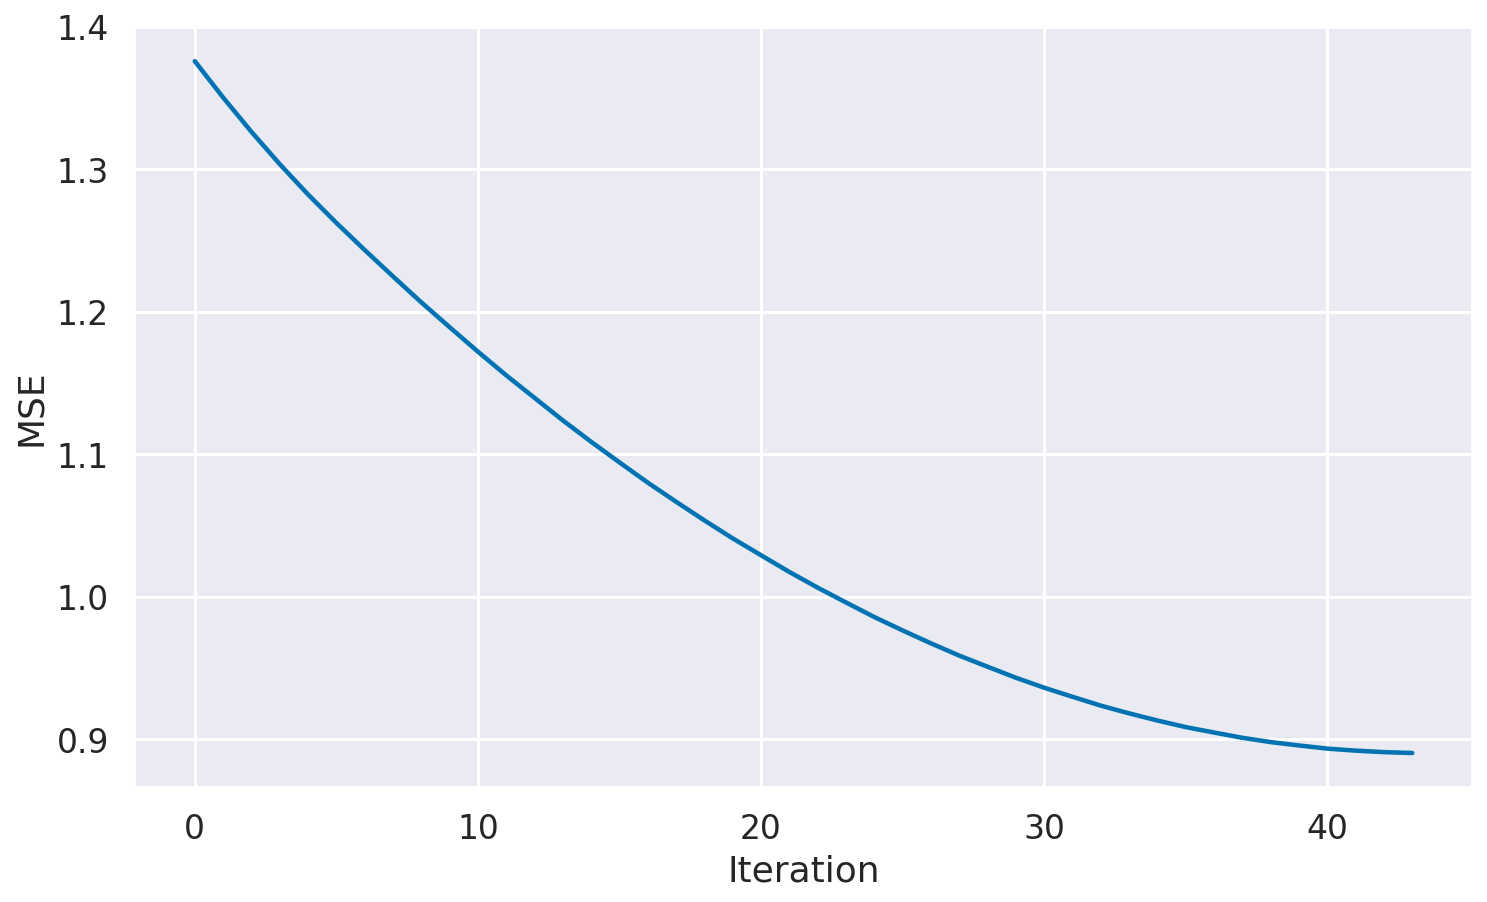

In [48]:
# Plot the MSE of all the records
output = np.array(trace)
plt.plot(output[:,0])
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.show()

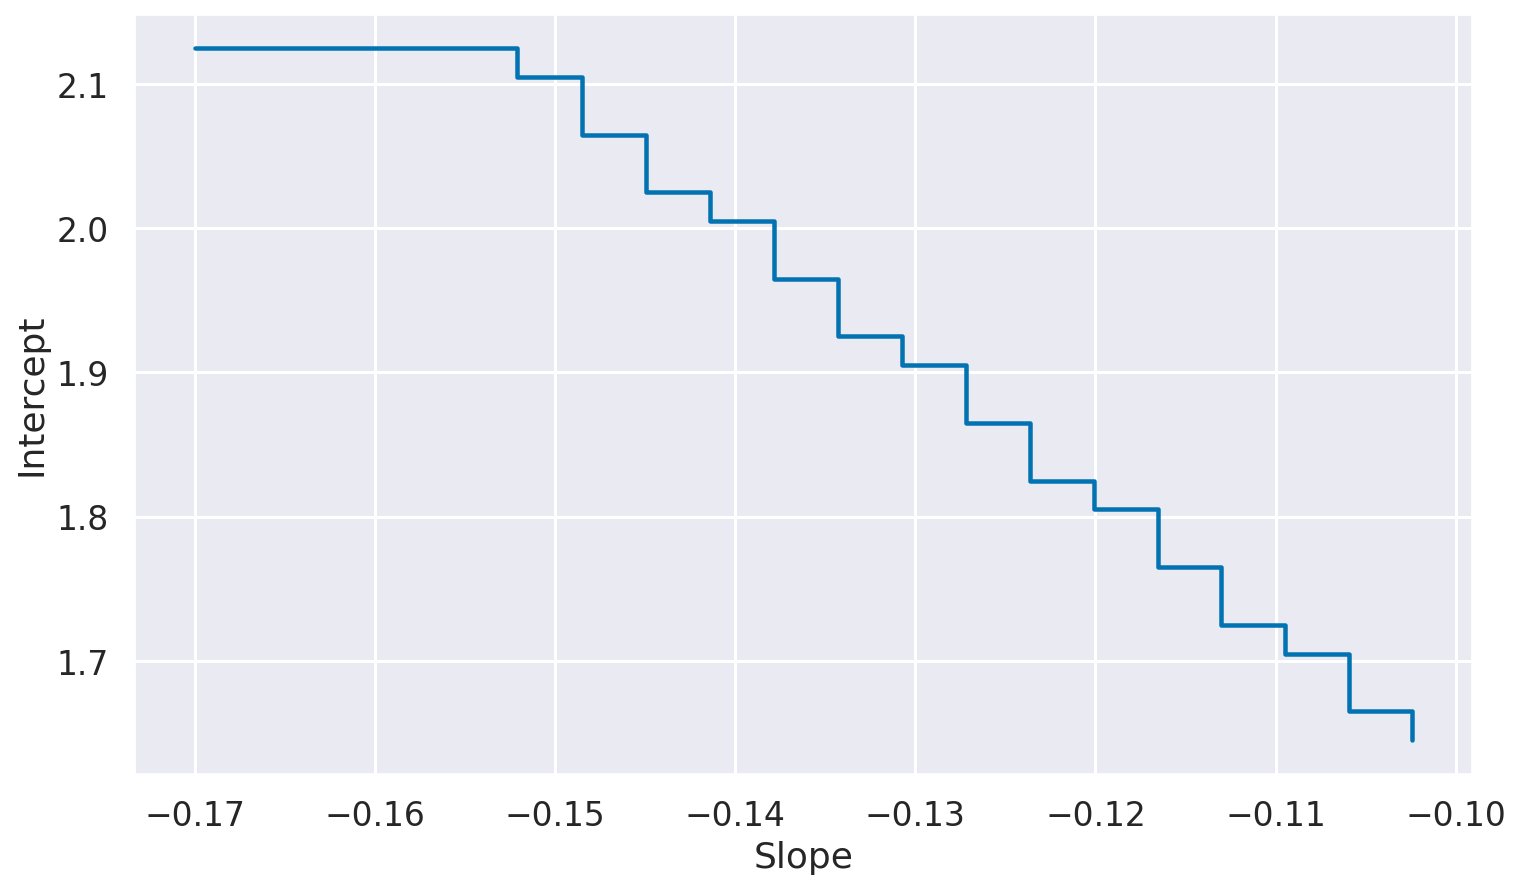

In [49]:
plt.plot(output[:,1], output[:,2])
plt.xlabel("Slope")
plt.ylabel("Intercept")
plt.show()

(20, 20, 101)


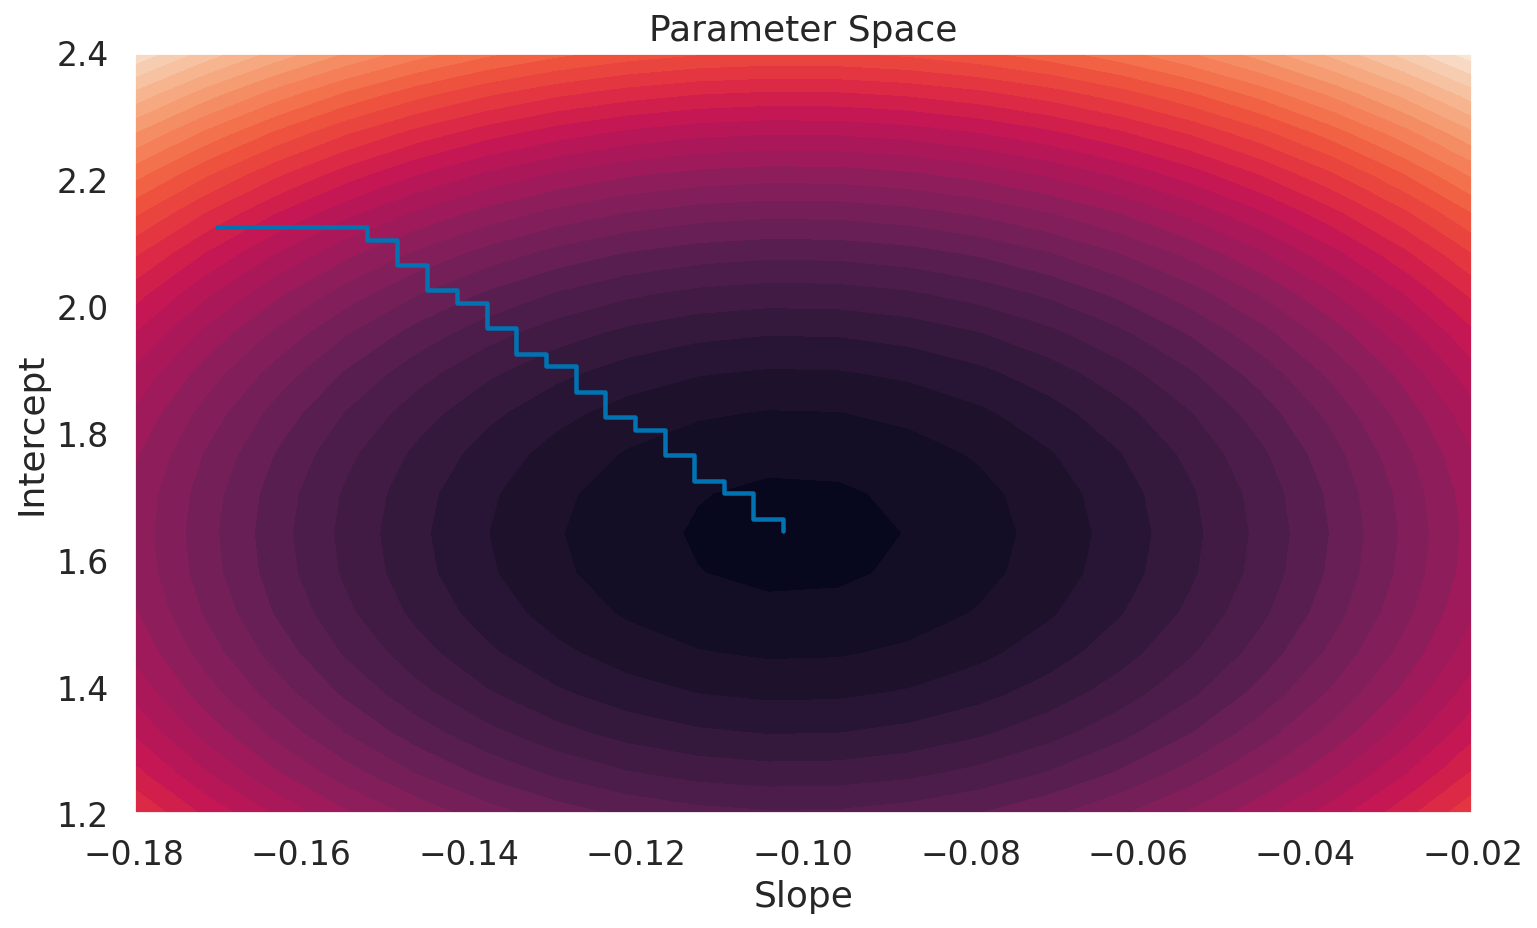

In [50]:
def f(a, b, x):
    return a * x + b

a = np.linspace(-0.18, -0.02, 20)
b = np.linspace(2.4, 1.2, 20)

x = mdates
A, B, X = np.meshgrid(a, b, x)

F = f(A, B, X)

y = abc_annualised
(_, _, Y) = np.meshgrid(np.ones(20), np.ones(20), y)
print(Y.shape)
sdiff = (Y - F)**2
sdiff.shape
sse = np.sum(sdiff, 2)
sse.shape
mse = sse/len(x)

mse.shape
A1, B1 = np.meshgrid(a, b)

plt.contourf(A1, B1, mse, 30)

plt.plot(output[:,1], output[:,2])
plt.xlabel("Slope")
plt.ylabel("Intercept")
plt.title("Parameter Space")

plt.show()

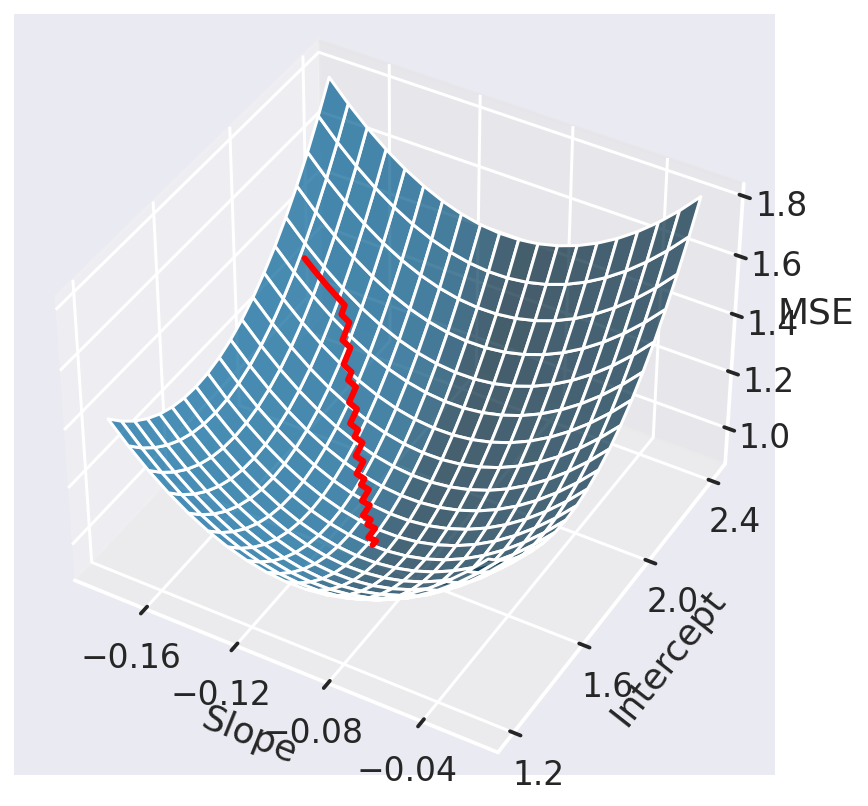

In [51]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(A1, B1, mse, alpha=0.7)
ax.plot3D(output[:,1], output[:,2], 
          output[:,0], color='red', linewidth=3)

ax.set_xlabel("Slope")
ax.set_ylabel("Intercept")
ax.set_zlabel("MSE")
ax.set_xticks([-0.16, -0.12, -0.08, -0.04])
ax.set_yticks([1.2, 1.6, 2.0, 2.4])
ax.view_init(40, 300)
plt.show()

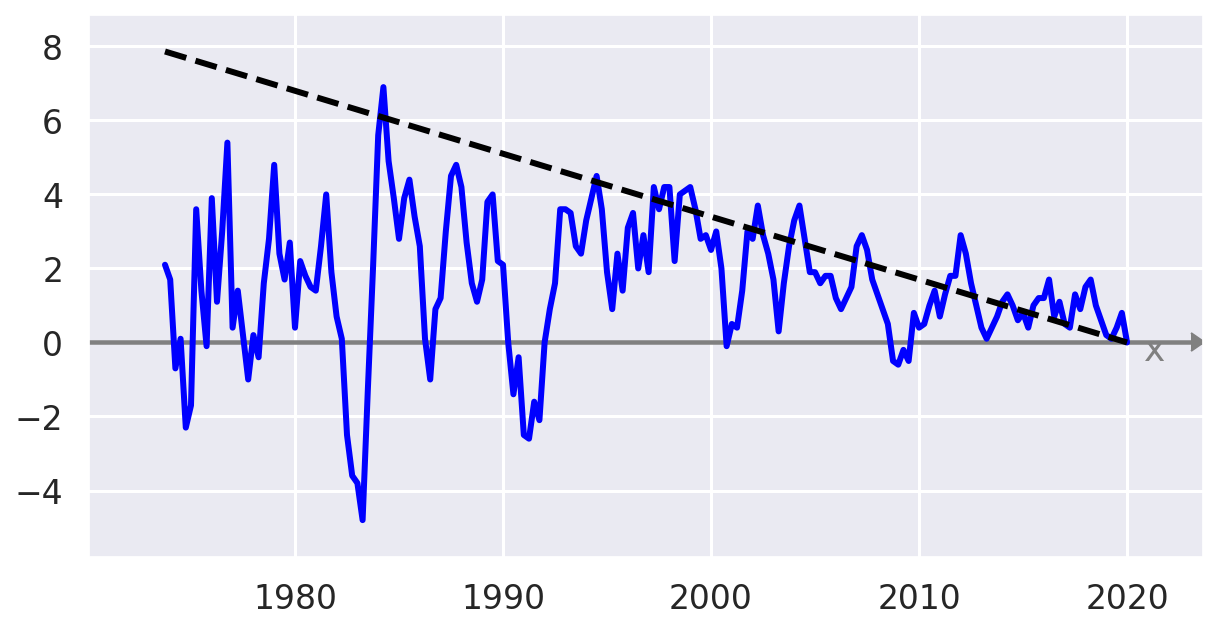

In [52]:
slope = -0.170
intercept = 343.4
plot_trends(dates, annualised, slope, intercept, residuals=False)

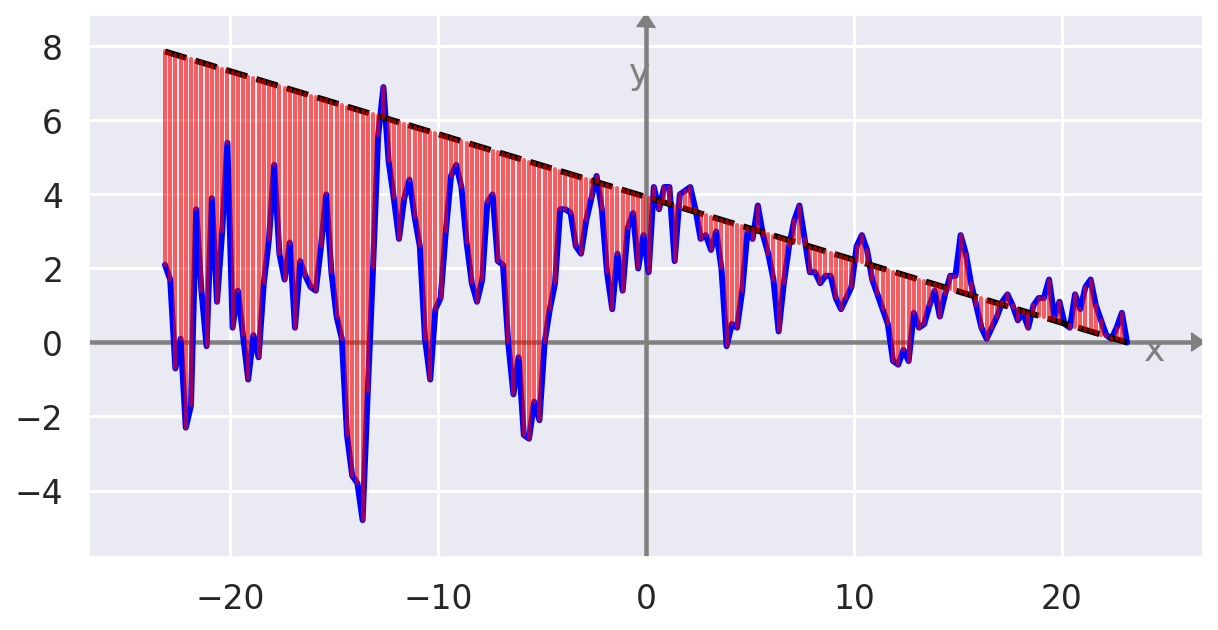

Slope: -0.17 	Intercept: 3.9312499999999773 	MSE: 13.237720598118175


In [53]:
lope = -0.170
intercept = 343.4

# New valued shifted by median
mdates = dates - np.median(dates)
mslope = slope
mintercept = get_line(np.median(dates), slope, intercept)

plot_trends(mdates, annualised, mslope, mintercept)
print("Slope:", mslope, "\tIntercept:", mintercept, "\tMSE:",
      skmse(annualised, get_line(mdates, mslope, mintercept)))

In [54]:
(opt_mse, opt_slope, opt_intercept, trace) = optimise(mdates,
                                                      annualised,
                                                      mslope, 0.1,
                                                      mintercept,
                                                      0.02, quiet = True)
opt_mse

3.270276858781611

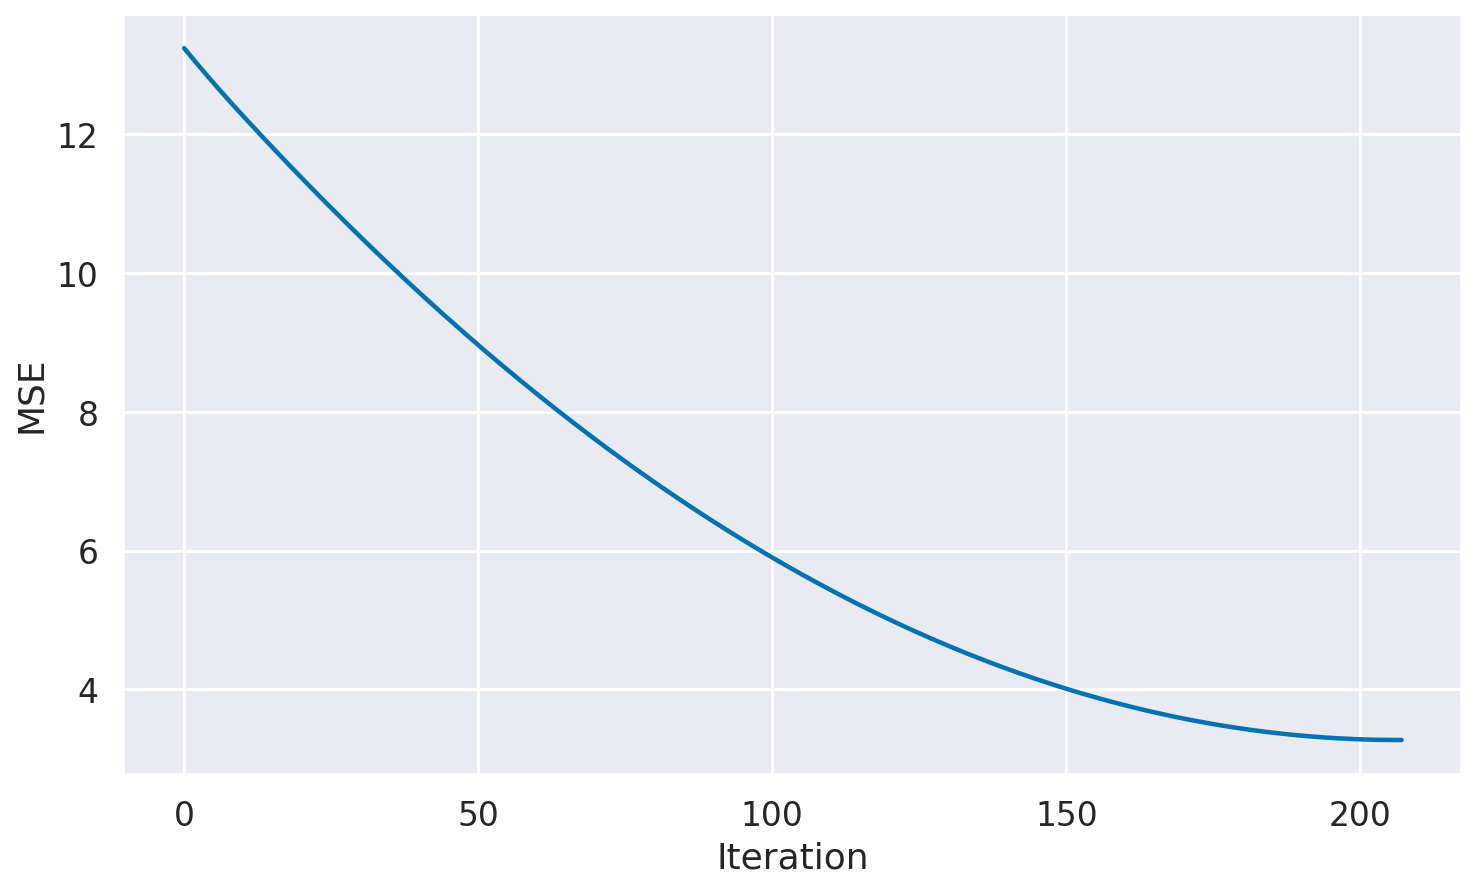

In [55]:
# Plot the MSE of all the records
output = np.array(trace)
plt.plot(output[:,0])
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.show()

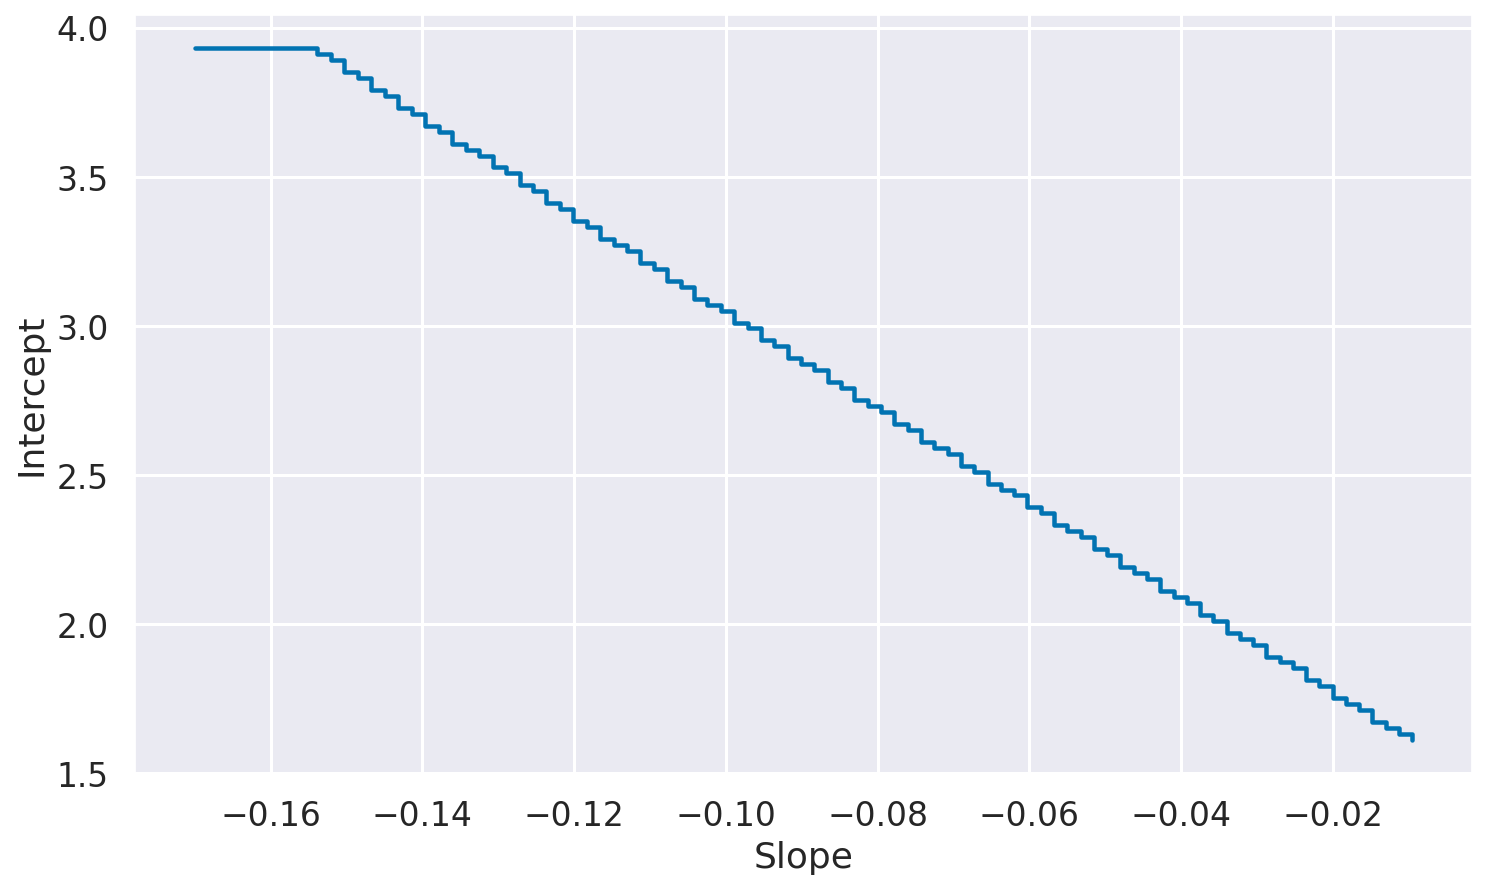

In [56]:
plt.plot(output[:,1], output[:,2])
plt.xlabel("Slope")
plt.ylabel("Intercept")
plt.show()

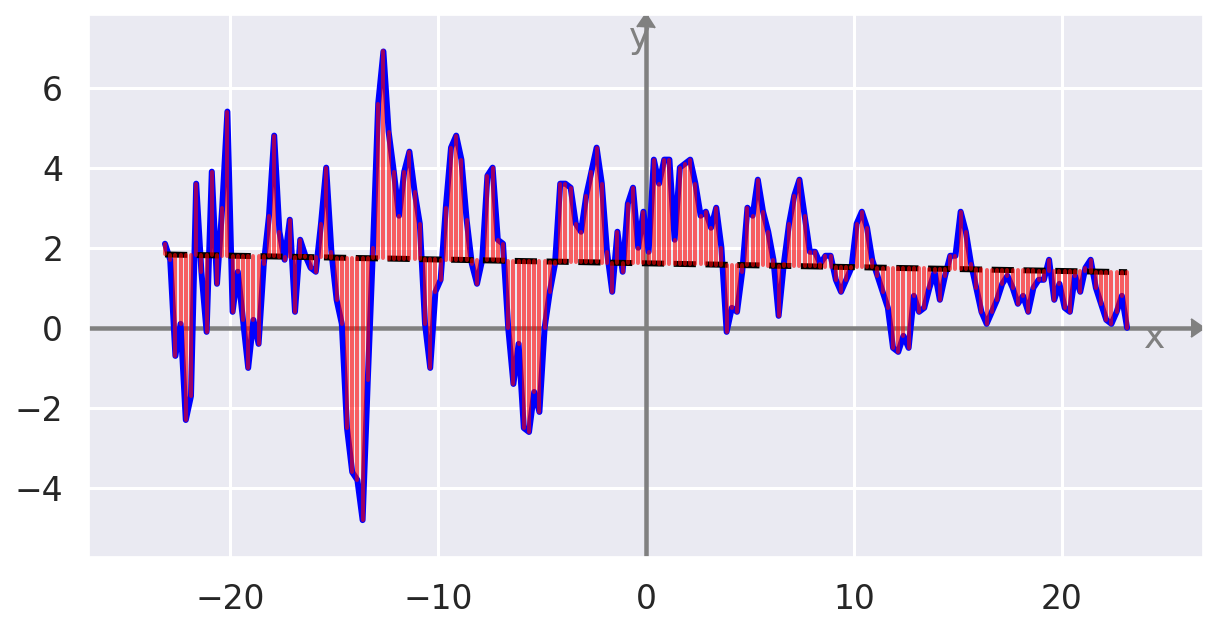

In [57]:
plot_trends(mdates, annualised, opt_slope, opt_intercept, residuals=True)

In [58]:
prove_my_point = dates >= 2008 # my recent decades
pmp_dates = dates[prove_my_point]
pmp_annualised = annualised[prove_my_point]

slope = -0.170
intercept = 343.4

pmp_mdates = pmp_dates - np.median(pmp_dates)

mslope = slope
mintercept = get_line(np.median(pmp_dates), slope, intercept)

print(len(pmp_dates))
print(len(pmp_annualised))

# (opt_mse, opt_slope, opt_intercept, trace) = optimise(mdates, pmp_annualised, mslope, 0.2, mintercept, 0.02, quiet = True)

49
49


In [59]:
xs = dates
ys = annualised

n = len(xs)

# Calculate the smaple means
x_bar = np.sum(xs) / n
y_bar = np.sum(ys) / n

print(n, x_bar, y_bar)

186 1996.875 1.616666666666667


In [60]:
xdiffs = xs - np.full_like(xs, x_bar)
ydiffs = ys - np.full_like(ys, y_bar)

a = np.sum(xdiffs * ydiffs) / np.sum(xdiffs ** 2)
b = y_bar - a * x_bar

print(a)
print(b)

-0.010042473040575513
21.670230019565896


In [61]:
# a is the slope
# b is the intercept when the x euquals to 0
intercept = get_line(np.median(dates), a, b)
intercept

1.6166666666666671

In [62]:
np.mean(ydiffs ** 2)

3.2883781362007167

In [63]:
skmse(annualised, get_line(dtaes, a,))

NameError: name 'dtaes' is not defined